# Steps in Machine Learning model

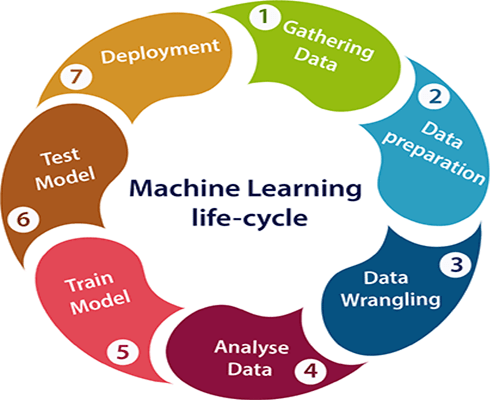

# Data Cleaning steps

## Aim: 

- To identify and remove errors & duplicate data, in order to create a reliable dataset.
- This improves the quality of the training data for analytics and enables accurate decision-making.
- Most critical task and commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. 

First, understand why there are missing values.

- Non-Response: Information not filled by subjects, for example, peoples usually don’t like to reveal their salaries, age, mobile number, etc.

- Human Error: Data collection is done improperly or mistakes are made in data entry.


## Types of missing data:

1. __Missing Completely At Random (MCAR)__:

The data are missing is independent of the observed and unobserved data i.e there is NO RELATIONSHIP between data missing with any other variables/ columns/ features observations within the dataset.

For example, When a random sample is taken from the population, where each member has the same chance of being included in the sample. The (unobserved/ not taken) data of members in the population that were not included in the sample are MCAR.

2. __Missing Data Not At Random (MNAR)__:

The data are missing is systematically related to the unobserved data i.e there is a RELATIONSHIP between data missing with any other variables/ columns/ features observations within the dataset.

For example, in public opinion surveys occurs if those with weaker opinions respond less often.
MNAR is the most complex case. Need strategies to handle missing data to find more data about the causes for the missingness or to perform what-if analyses to see how sensitive the results are under various scenarios.

3. __Missing At Random (MAR)__:

The missing data is systematically related to the observed but not the unobserved data i.e probability of missing data for that category is the same. MAR is more general and more realistic than MCAR. Modern missing data methods generally start from the MAR assumption.

For example, People usually try to avoid sharing personal data during surveys like most men don’t like to share their salaries, and similarly, women don't like to share their age.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring the data set

In [4]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)

In [5]:
describe_data(train)

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Rows and Columns:
(891, 12)
Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Understanding Data Attribute Types

### Attribute:

It can be seen as a data field that represents the characteristics or features of a data object. For a customer, object attributes can be customer Id, address, etc. We can say that a set of attributes used to describe a given object are known as attribute vector or feature vector. 

### Type of attributes : 

This is the First step of Data Data-preprocessing. We differentiate between different types of attributes and then preprocess the data. 

1. Qualitative (Nominal (N), Ordinal (O), Binary(B))
2. Quantitative (Numeric, Discrete, Continuous) 
 

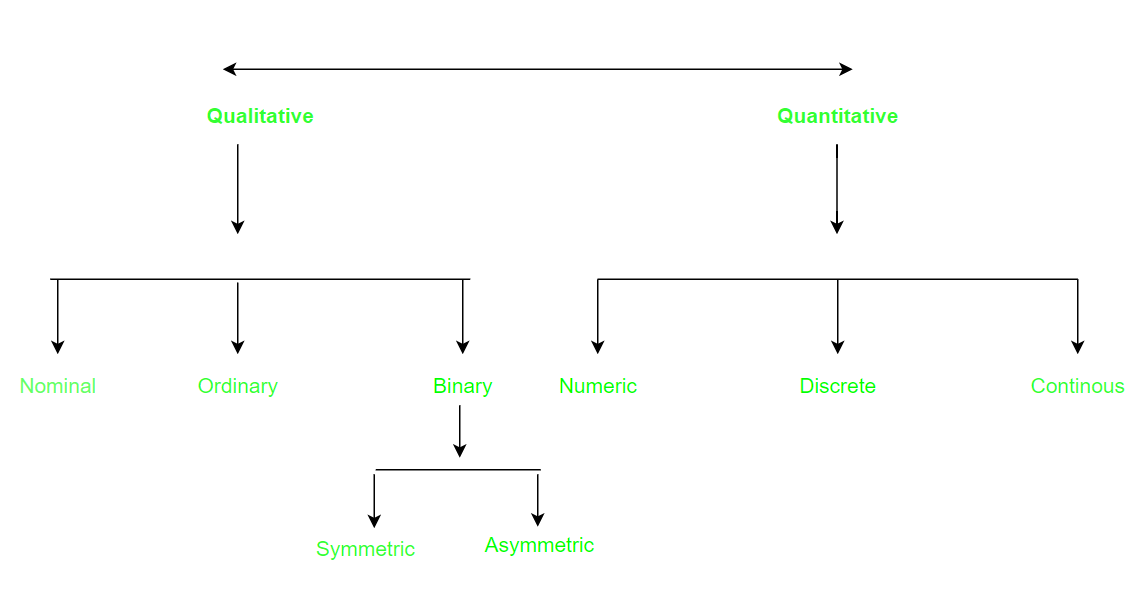

Qualitative Attributes:
 
1. __Nominal Attributes__ – related to names: The values of a Nominal attribute are names of things, some kind of symbols. Values of Nominal attributes represents some category or state and that’s why nominal attribute also referred as categorical attributes and there is no order (rank, position) among values of the nominal attribute. 

Example : 

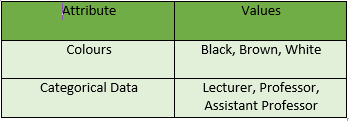

2. __Binary Attributes__: Binary data has only 2 values/states. For Example yes or no, affected or unaffected, true or false. 

Symmetric: Both values are equally important (Gender)

Asymmetric: Both values are not equally important (Result)

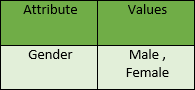  

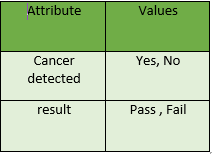

3. __Ordinal Attributes__ :

The Ordinal Attributes contains values that have a meaningful sequence or ranking(order) between them, but the magnitude between values is not actually known, the order of values that shows what is important but don’t indicate how important it is. 

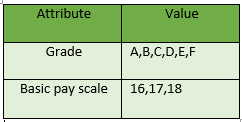

Quantitative Attributes:
    
1.__Numeric__: A numeric attribute is quantitative because, it is a measurable quantity, represented in integer or real values. Numerical attributes are of 2 types, interval, and ratio. 

2.__Discrete__ : Discrete data have finite values it can be numerical and can also be in categorical form. These attributes has finite or countably infinite set of values. 
 

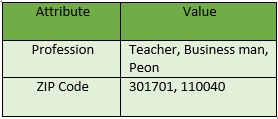

3.__Continuous__: Continuous data have an infinite no of states. Continuous data is of float type. There can be many values between 2 and 3. 

Example : 

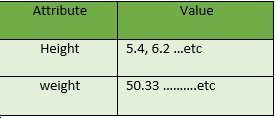

In [6]:
train.select_dtypes(include=['object']).dtypes #Checking the Categorical columns

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [7]:
train.select_dtypes(include=['int','float']).dtypes #Checking the Numerical values

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## As you explore the features, you can pay attention to any column that:

- is formatted poorly,
- requires more data or a lot of pre-processing to turn into useful a feature, or
- contains redundant information,

## To clean the data set, you need to handle missing values 
because the mathematics underlying most machine learning models assumes that the data is numerical and contains no 

missing values. Moreover, the scikit-learn library returns an error if you try to train a model like linear regression 

and logistic regression using data that contain missing or non-numeric values.

## Dealing with Missing Values

Missing data is perhaps the most common trait of unclean data. These values usually take the form of NaN or None.

Here are several causes of missing values: sometimes values are missing because they do not exist, or because of 

improper collection of data or poor data entry. For example, if someone is underage, and the question applies to 

people over 18, then the question will contain a missing value. In such cases, it would be wrong to fill in a value 

for that question.



## There are several ways to fill up missing values:

- you can remove the lines with the data if you have your data set is big enough and the percentage of missing values is high (over 50%, for example);

- you can fill all null variables with 0 is dealing with numerical values;

- you can use the Imputerclass from the scikit-learn library to fill in missing values with the data’s (mean, median, most_frequent)

- you can also decide to fill up missing values with whatever value comes directly after it in the same column.

- These decisions depend on the type of data, what you want to do with the data, and the cause of values missing. In reality, just because something is popular doesn’t necessarily make it the right choice. The most common strategy is to use the mean value, but depending on your data, you may come up with a totally different approach.

## 1. __Deleting Rows__

This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

In [9]:
train1 = train.copy()

In [13]:
train1.dropna(subset=['Embarked'],inplace=True)
train1.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

- __Pros__:

Complete removal of data with missing values results in robust and highly accurate model
Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

- __Cons__:

Loss of information and data
Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset

## 2. Replacing With Mean/Median/Mode

This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare. We can 

calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation 

which can add variance to the data set. But the loss of the data can be negated by this method which yields better 

results compared to removal of rows and columns. Replacing with the above three approximations are a statistical 

approach of handling the missing values. This method is also called as leaking the data while training. Another way is 

to approximate it with the deviation of neighbouring values. This works better if the data is linear. 

In [14]:
train2 = train.copy()

In [15]:
train2['Age'].isnull().sum()

177

In [16]:
train2['Age'].mean()

29.69911764705882

In [17]:
train2['Age'].replace(np.NaN, train2['Age'].mean()).head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [18]:
train2['Age'].median()


28.0

In [19]:
train2['Age'].mode()

0    24.0
dtype: float64

- Pros:

This is a better approach when the data size is small

It can prevent data loss which results in removal of the rows and columns
- Cons:

Imputing the approximations add variance and bias

Works poorly compared to other multiple-imputations method

## Handling Missing Categorical Variables

In [20]:
train_new = train.copy()

In [21]:
# Code to get number of categories in missing value columns
print("Number of Categories in: ")

for ColName in train_new[['Embarked','Sex','Cabin']]:
    print("{} = {}".format(ColName, len(train_new[ColName].unique())))

Number of Categories in: 
Embarked = 4
Sex = 2
Cabin = 148


# 1. Frequent Categorical Imputation


- Assumptions: Data is Missing At Random (MAR) and missing values look like the majority.
- Description: Replacing NAN values with the most frequent occurred category in variable/column.

- Implementation:

Step 1: Find which category occurred most in each category using mode().

Step 2: Replace all NAN values in that column with that category.

Step 3: Drop original columns and keep newly imputed columns.

In [22]:
train_new1 = train.copy()

In [23]:
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
#2. Call function to impute most occured category
for Columns in ['Embarked','Sex','Cabin']:
    impute_nan_most_frequent_category(train_new1,Columns)
    
# Display imputed result
train_new1[['Embarked','Embarked_Imputed','Sex','Sex_Imputed','Cabin','Cabin_Imputed']].head(10)
#3. Drop actual columns
train_new1 = train_new1.drop(['Embarked','Sex','Cabin'], axis = 1)


In [24]:
train_new1.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_Imputed,Sex_Imputed,Cabin_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,male,B96 B98
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,female,C85
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,female,B96 B98
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,female,C123
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,male,B96 B98


- Advantage: Simple and easy to implement for categorical variables/columns.
    
- Disadvantage: Features having a max number of null values may bias prediction if replace with the most occurred category. It distorts the relation of the most frequent label.

## 2. Adding a Variable To Capture NAN

Assumptions: No assumption, can be work with all type categorical columns.

Description: Replace NAN categories with most occurred values, and add a new feature to introduce some weight/importance to non-imputed and imputed observations.

### Implementation:

Step 1. Create a new column and replace 1 if the category is NAN else 0. This column is an importance column to the imputed category.

Step 2. Replace NAN value with most occurred category in the actual column.

In [25]:
# Function to impute most occured category and add importance vairable
def impute_nan_add_vairable(DataFrame,ColName):
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    
    Mode_Category = train[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    
    DataFrame[ColName].fillna(Mode_Category,inplace=True)
# Call function to impute NAN values and add new importance feature
for Columns in ['Embarked','Sex','Cabin']:
    impute_nan_add_vairable(train,Columns)
    
# Display top 10 row to see the result of imputation
train[['Embarked','Embarked_Imputed','Sex','Sex_Imputed','Cabin','Cabin_Imputed']].head(10)

,Embarked,Embarked_Imputed,Sex,Sex_Imputed,Cabin,Cabin_Imputed
0,S,0,male,0,B96 B98,1
1,C,0,female,0,C85,0
2,S,0,female,0,B96 B98,1
3,S,0,female,0,C123,0
4,S,0,male,0,B96 B98,1
5,Q,0,male,0,B96 B98,1
6,S,0,male,0,E46,0
7,S,0,male,0,B96 B98,1
8,S,0,female,0,B96 B98,1
9,C,0,female,0,B96 B98,1


- Advantage: Capture the importance of missingness.
    
- Disadvantage:

Creating Additional Features(Curse of Dimensionality) e.g. if there are 10 columns have null values need to create 10 extra columns.

Potentially misunderstood data & the number of missing data should be large enough.

## 3. Create a New Category (Random Category) for NAN Values

Assumptions: No assumption
Description: Create a new category for NAN values i.e random category.

Implementation:

Step 1. Replace NAN value with a new name (here we create a new category as Unknown).

Step 2. Display result

In [26]:
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])
## Call function to create new category for variables
for Columns in ['Embarked','Sex','Cabin']:
    impute_nan_create_category(train,Columns)
#2. Display result
train[['Embarked','Sex','Cabin']].head(10)

,Embarked,Sex,Cabin
0,S,male,B96 B98
1,C,female,C85
2,S,female,B96 B98
3,S,female,C123
4,S,male,B96 B98
5,Q,male,B96 B98
6,S,male,E46
7,S,male,B96 B98
8,S,female,B96 B98
9,C,female,B96 B98


- Advantage: 

Simple and easy to implement for categorical variables/columns and preserves the variance.

- Disadvantage:

May create random data if the missing category is more.
Doesn’t give good results when missing data is a high percentage of the data.


### Conclusion

The above implementation is to explain different ways we can handle missing categorical data. The most widely used methods are Create a New Category (Random Category) for NAN Values and Most frequent category imputation.

# pandas.get_dummies() is used for data manipulation. 

It converts categorical data into dummy or indicator variables.

Create Dummies

Description: Create dummies or binary type columns for each category in the object/ category type feature. The value for each row is 1 if that category is available in that row else 0. To create dummies use pandas get_dummies() function.

In [27]:
cat_train = train.copy()

In [28]:
sex_dummies = pd.get_dummies(cat_train, columns=["Sex"])

In [29]:
print("The original DataFrame is:")
print(cat_train, "\n")

print("DataFrame with Dummies:")
print(sex_dummies)

The original DataFrame is:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                        

In [30]:
describe_data(sex_dummies)

Data Types:
PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Embarked_Imputed      int64
Sex_Imputed           int64
Cabin_Imputed         int64
Sex_female            uint8
Sex_male              uint8
dtype: object
Rows and Columns:
(891, 16)
Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_Imputed',
       'Sex_Imputed', 'Cabin_Imputed', 'Sex_female', 'Sex_male'],
      dtype='object')


__Advantage__:
    
Easy to use and fast way to handle categorical column values.

__Disadvantage__:
    
get_dummies method is not useful when data have many categorical columns.
If the category column has many categories leads to add many features into the dataset.
Hence, This method is only useful when data having less categorical columns with fewer categories.